#*Name :* _**Jonnada Sai Rahul**_
#*Technical Task-2 :* _**Prediction Using UnSupervised ML**_
##*Level :* _**Beginner**_

###In this Task we predict the optimum number of clusters and represent it visually From the given ‘Iris’ dataset.

### **IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 
from sklearn import datasets

**READING THE IRIS DATASET**

In [4]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**CONSTRAINS**

In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**ALL COLUMNS AND DATATYPES**

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**CHECKING WHETHER THERE IS ANY NULL VALUE**

In [10]:
iris_df.isnull == True

False

**FROM (iris_df.isnull == True >> False) WE UNDERSTOOD THAT DATASET HAS NO NULLVALUES**

**SHAPE OF THE DATASET**

In [12]:
iris_df.shape

(150, 4)

**CHECKING FOR ANY DUPLICATE VALUES**

In [13]:
iris_df.duplicated().sum()

1

**DROPING THE DUPLICATE VALUE**

In [14]:
iris_df.drop_duplicates(inplace=True)

**CHECKING THE SHAPE OF DF TO VERIFY THE DUPLICATE VALUE HAS DROPED**

In [15]:
iris_df.shape

(149, 4)

**CHECKING FOR THE OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


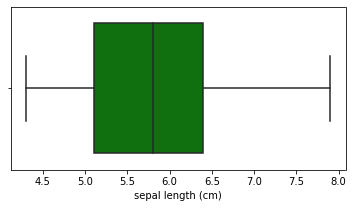

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


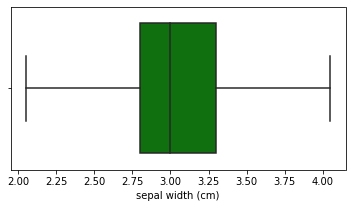

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


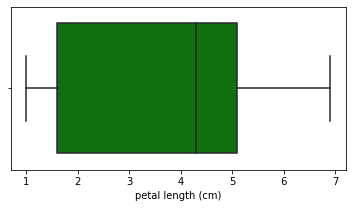

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


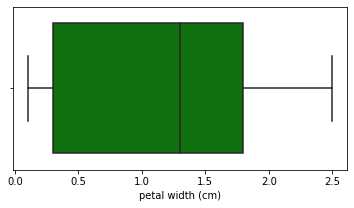

In [55]:
for i in iris_df.columns:
    if iris_df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris_df[i], color='green')
        plt.show()

**TREATING THE OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


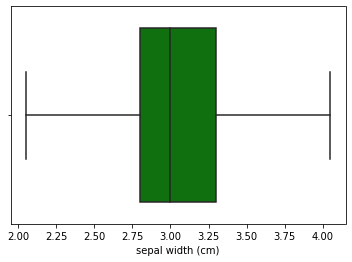

In [56]:
q1,q3=np.percentile(iris_df['sepal width (cm)'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
iris_df['sepal width (cm)'] = iris_df['sepal width (cm)'].apply(lambda x: upper_fence if x>upper_fence else lower_fence if x<lower_fence else x)
sns.boxplot(iris_df['sepal width (cm)'], color='green')

**CORRELATION MATRIX**

In [26]:
iris_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.119293,0.873738,0.820620
sepal width (cm),-0.119293,1.000000,-0.425425,-0.362030
petal length (cm),0.873738,-0.425425,1.000000,0.962772
petal width (cm),0.820620,-0.362030,0.962772,1.000000


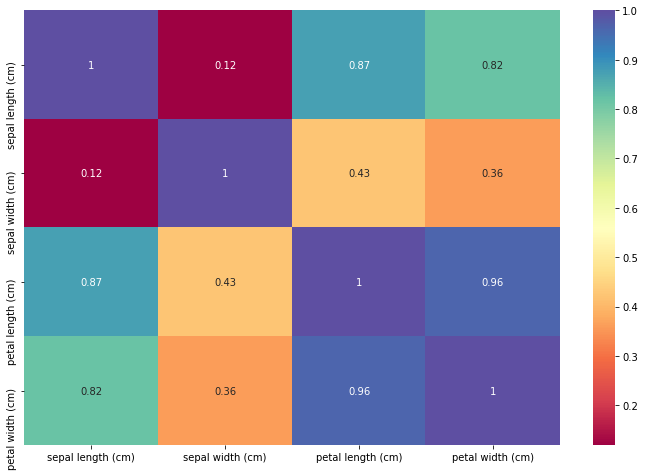

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(iris_df.corr()), cmap='Spectral', annot=True)
plt.show()

**FINDING THE OPTINUM NUMBER USING K-CLUSTERS**

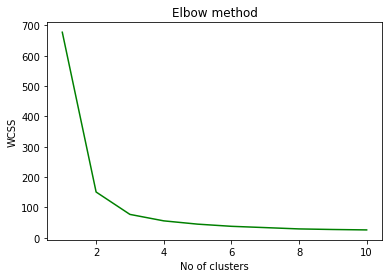

In [57]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, color='green')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS') 
plt.show()

**APPLYING KMEANS TO THE DATA SET (NO OF CLUSTERS IS 3)**

In [60]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

**VISUALIZING THE CLUSTERS**

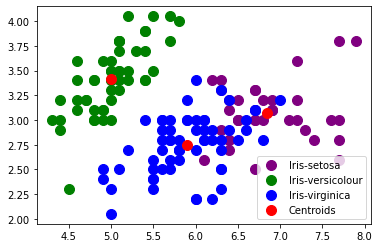

In [79]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

**PLOTTING CENTROIDS OF CLUSTER**

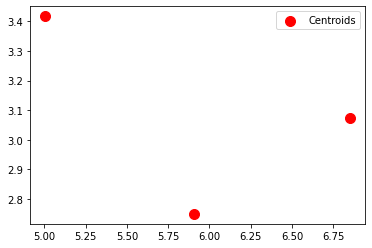

In [78]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

In [80]:
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


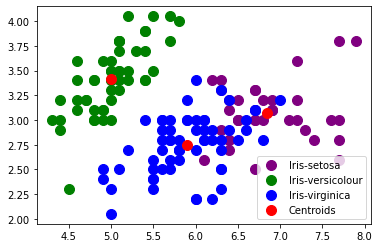

In [82]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

###***Therefore, We have successfully predicted the optimum number of clusters and represented it visually***